In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# MNIST Veri Setini İndiriyoruz

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
# Görüntüleri reshape fonksiyonu ile tek kanallı hale getiriyoruz

# -1 demek, kaç tane görüntü varsa onu temsil etmesi demek
# Her veri setinde biz tüm görüntü sayısını ezbere bilemeyiz. Bunu ifade etmesi
# için bu tarz reshape işlemlerinde -1 değerini veririz.

# Sondaki 1 değeri ise kanal sayısını ifade ediyor. Yani tek kanallı-gri seviye

x_train = x_train.reshape(-1, 28, 28 , 1)
x_test = x_test.reshape(-1, 28, 28 , 1)

# Görüntüleri yeniden boyutlandırdıktan sonra şimdi de normalizasyon
# uygulayıp tüm piksel değerlerini 0 ila 1 arasına çekiyoruz

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

(60000, 28, 28, 1)
(60000,)


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


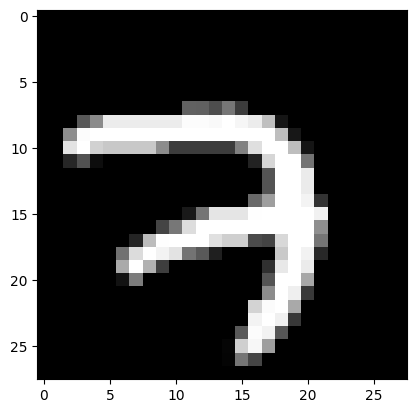

In [6]:
plt.imshow(x_train[5000],cmap="gray")

In [12]:
y_train[58500]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [11]:
y_train[5000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
# Eğitim verilerini, modele aktarmadan önce kendi içerisinde eğitim-doğrulama
# yani train-validation olarak split edeceğiz. Yani, ayıracağız.

X_train, X_val, y_train_split, y_val = train_test_split(
    x_train, y_train, # split yaparken x_train ve y_train'i kullan
    test_size=0.2, # eğitim verilerinin %20'sini validation yap
    random_state=42, # buraya verdiğiniz değeri sonraki çalıştırmada da
    #verirseniz eğer aynı rassallıkla split eder
    stratify=y_train # eğer sınıflar arasında bir dengesizlik varsa (Örneğin
# 9 rakamından çok daha fazla varsa, split yaparken bu orana göre yapar) 
)

In [15]:
# CNN Modelimizi tanımlıyoruz.
# Yapay zekâ'da model eğitimi şöyle ilerler:
# 1) Modeli tanımla
# 2) Modeli Derle
# 3) Modeli Eğit
# 4) Modeli Test et

model = keras.Sequential([
    # 1. CNN Blok'u
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),# Bu, ölçeklendirme ve stabilizasyon
    # görevi görür, hatanın yakınsaması durumunu stabilize eder
    # modelin ciddi sapmalar üretmesinin ve aşırı öğrenmesinin önüne geçer
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    # 2. CNN Blok'u
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    # Yapay Sinir Ağı'nı Tanımlıyoruz
    keras.layers.Flatten(),# çok küçük hale gelmiş görüntünü vektör 
    # haline getirip bir ip gibi düzleştiriyoruz
    keras.layers.Dense(512,activation="relu"),# 512 nöronlu bir katman
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax")
    
])

In [16]:
# 2) Modelimizi derliyoruz
# Derlemekten kasıt şudur, bu model eğitim yaptığı esnada neye göre eğitim
# yapacak, hatayı hesaplarken ya da modelin başarısını ölçerken neye göre 
# yapacak sorusunun cevabını burada belirtiyoruz

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [17]:
# 3) Modelimizi Eğitiyoruz

model.fit(
    X_train, y_train_split, validation_data=(X_val, y_val),
    batch_size=128, epochs=4, verbose=1
)

Epoch 1/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.8718 - loss: 0.4432 - val_accuracy: 0.1427 - val_loss: 6.3264
Epoch 2/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9781 - loss: 0.0694 - val_accuracy: 0.9794 - val_loss: 0.0709
Epoch 3/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 4/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9875 - loss: 0.0379 - val_accuracy: 0.9910 - val_loss: 0.0288
